<a href="https://colab.research.google.com/github/felipecadm/carteira-de-ativos/blob/main/Carteira_de_Ativos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install -q yfinance

     |████████████████████████████████| 62 kB 702 kB/s 


In [3]:
import pandas as pd
import numpy as np
from pandas_datareader import data
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px 
import yfinance as yf

In [4]:
acoes = ['ENBR3.SA', 'ITSA4.SA', 'PETR4.SA', 'BOVA11.SA']
acoes

['ENBR3.SA', 'ITSA4.SA', 'PETR4.SA', 'BOVA11.SA']

In [5]:
acoes_df = pd.DataFrame()

In [6]:
for acao in acoes:
  acoes_df[acao] = yf.download(acao, start='2020-02-01')['Close']

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


In [7]:
acoes_df

,ENBR3.SA,ITSA4.SA,PETR4.SA,BOVA11.SA
Date,,,,
2020-02-03,22.959999,12.238095,28.180000,110.419998
2020-02-04,22.510000,12.266666,28.629999,111.209999
2020-02-05,22.450001,12.333333,28.389999,111.769997
2020-02-06,22.230000,12.209523,29.180000,110.949997
2020-02-07,21.500000,12.180952,28.930000,109.349998
...,...,...,...,...
2022-08-23,23.459999,9.320000,33.439999,109.099998
2022-08-24,23.040001,9.290000,33.639999,109.180000
2022-08-25,23.120001,9.380000,33.279999,109.599998


In [8]:
acoes_df = acoes_df.rename(columns={'ENBR3.SA': 'EDP', 'ITSA4.SA': 'ITSA', 'PETR4.SA': 'PETR', 'BOVA11.SA': 'IBOV'})

In [9]:
acoes_df

,EDP,ITSA,PETR,IBOV
Date,,,,
2020-02-03,22.959999,12.238095,28.180000,110.419998
2020-02-04,22.510000,12.266666,28.629999,111.209999
2020-02-05,22.450001,12.333333,28.389999,111.769997
2020-02-06,22.230000,12.209523,29.180000,110.949997
2020-02-07,21.500000,12.180952,28.930000,109.349998
...,...,...,...,...
2022-08-23,23.459999,9.320000,33.439999,109.099998
2022-08-24,23.040001,9.290000,33.639999,109.180000
2022-08-25,23.120001,9.380000,33.279999,109.599998


In [10]:
acoes_df.to_csv('acoes_.csv')

In [11]:
acoes_df.isnull().sum()

EDP     0
ITSA    0
PETR    0
IBOV    0
dtype: int64

In [12]:
acoes_df.to_csv('acoes.csv')

In [13]:
acoes_df.describe()

,EDP,ITSA,PETR,IBOV
count,639.000000,639.000000,639.000000,639.000000
mean,19.341127,9.800613,26.217277,103.678032
std,1.864459,0.955232,4.960647,12.369870
min,13.790000,7.171428,11.290000,61.139999
25%,17.964999,9.152380,22.799999,97.070000
50%,18.990000,9.742857,27.090000,105.830002
75%,20.850000,10.514285,29.390000,112.238400
max,24.170000,12.733333,37.230000,125.750000


In [14]:
acoes_df.columns

Index(['EDP', 'ITSA', 'PETR', 'IBOV'], dtype='object')

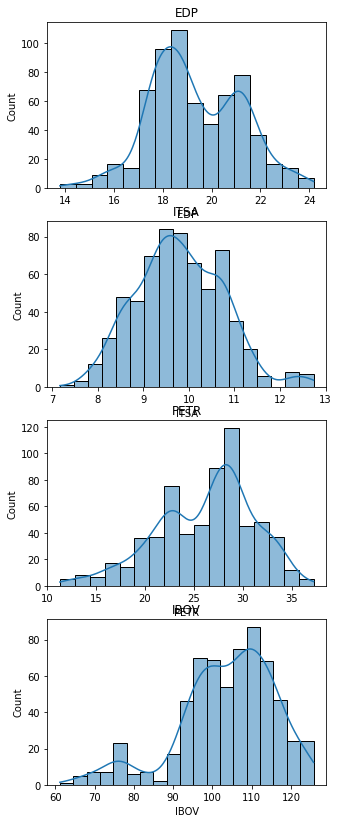

In [15]:
plt.figure(figsize=(5,25))
i = 0
for i in np.arange(0,len(acoes_df.columns)):
  plt.subplot(7, 1, i + 1)
  sns.histplot(acoes_df[acoes_df.columns[i]], kde= True)
  plt.title(acoes_df.columns[i])

In [16]:
acoes_df_normalizado = acoes_df.copy()
for i in acoes_df_normalizado.columns:
  acoes_df_normalizado[i] = acoes_df_normalizado[i] / acoes_df_normalizado[i][0]
type(acoes_df_normalizado)

pandas.core.frame.DataFrame

In [17]:
acoes_df_normalizado

,EDP,ITSA,PETR,IBOV
Date,,,,
2020-02-03,1.000000,1.000000,1.000000,1.000000
2020-02-04,0.980401,1.002335,1.015969,1.007155
2020-02-05,0.977788,1.007782,1.007452,1.012226
2020-02-06,0.968206,0.997665,1.035486,1.004800
2020-02-07,0.936411,0.995331,1.026615,0.990310
...,...,...,...,...
2022-08-23,1.021777,0.761556,1.186657,0.988046
2022-08-24,1.003484,0.759105,1.193754,0.988770
2022-08-25,1.006969,0.766459,1.180979,0.992574


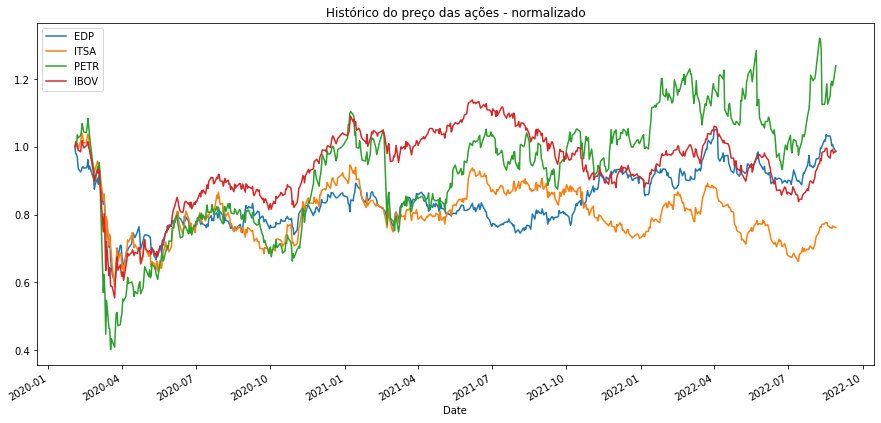

In [18]:
acoes_df_normalizado.plot(figsize = (15,7), title = 'Histórico do preço das ações - normalizado');

In [19]:
# valorização da compra até o dia atual
for ativo in acoes_df.columns:
  print(ativo, ((acoes_df[ativo][len(acoes_df) - 1] - acoes_df[ativo][0]) / acoes_df[ativo][0]) * 100)

EDP -1.3937269494084061
ITSA -23.844360752905907
PETR 23.953158008874247
IBOV -1.2407128599036688


In [20]:
# taxa de retorno simples (RS) - diário
RS = pd.DataFrame()
for ativo in acoes_df.columns:
  RS[ativo] = (acoes_df[ativo] / acoes_df[ativo].shift(1) - 1)
RS


,EDP,ITSA,PETR,IBOV
Date,,,,
2020-02-03,NaN,NaN,NaN,NaN
2020-02-04,-0.019599,0.002335,0.015969,0.007155
2020-02-05,-0.002665,0.005435,-0.008383,0.005035
2020-02-06,-0.009800,-0.010039,0.027827,-0.007336
2020-02-07,-0.032838,-0.002340,-0.008568,-0.014421
...,...,...,...,...
2022-08-23,-0.010127,0.000000,0.031780,0.022206
2022-08-24,-0.017903,-0.003219,0.005981,0.000733
2022-08-25,0.003472,0.009688,-0.010702,0.003847


In [21]:
# retorno anual
RS.mean() * 246 * 100

EDP      3.877165
ITSA    -4.907075
PETR    23.728503
IBOV     4.544871
dtype: float64

In [22]:
# Carteira composta por ativos para efeito de comparação com índice Bovespa
acoes_df_normalizado['CARTEIRA'] = (acoes_df_normalizado['EDP'] + acoes_df_normalizado['ITSA'] + acoes_df_normalizado['PETR']) / 3
acoes_df_normalizado

,EDP,ITSA,PETR,IBOV,CARTEIRA
Date,,,,,
2020-02-03,1.000000,1.000000,1.000000,1.000000,1.000000
2020-02-04,0.980401,1.002335,1.015969,1.007155,0.999568
2020-02-05,0.977788,1.007782,1.007452,1.012226,0.997674
2020-02-06,0.968206,0.997665,1.035486,1.004800,1.000452
2020-02-07,0.936411,0.995331,1.026615,0.990310,0.986119
...,...,...,...,...,...
2022-08-23,1.021777,0.761556,1.186657,0.988046,0.989997
2022-08-24,1.003484,0.759105,1.193754,0.988770,0.985448
2022-08-25,1.006969,0.766459,1.180979,0.992574,0.984802


In [23]:
# Gráfico dinâmico 
figura = px.line(title = 'Comparativo carteira x BOVA')
for i in acoes_df_normalizado.columns[-2:]:
  figura.add_scatter(x = acoes_df_normalizado.index, y = acoes_df_normalizado[i], name = i)
figura.show()

###Retorno Anual por Ativos (Taxa Logarítica)

In [147]:
Retorno_Anual = pd.DataFrame(columns=acoes_df.columns[0:3], index=[2020, 2021, 2022])


In [150]:
data_final = '-12-31'
for ativo in acoes_df.columns[0:3]:
  resultados = []
  for ano in Retorno_Anual.index:
    fim_ano = (str(ano-1) + data_final)
    inicio_ano = (str(ano) + data_final)
    valor_inicio_ano = acoes_df[(acoes_df[ativo].index > fim_ano) & (acoes_df[ativo].index <= inicio_ano)][ativo][0]
    valor_final_ano = acoes_df[(acoes_df[ativo].index > fim_ano) & (acoes_df[ativo].index <= inicio_ano)][ativo][-1]
    resultados.append(np.log(valor_final_ano / valor_inicio_ano) * 100)
  Retorno_Anual[ativo] = resultados

In [151]:
Retorno_Anual

,EDP,ITSA,PETR
2020,-15.567621,-9.119423,0.566172
2021,6.817459,-20.847884,-1.603936
2022,8.765403,3.271821,18.295159
